The data is the given in the form of (x^t, r^t) where x is the input and r is class code (1 or 2). The code builds a classifier assuming Gaussian densities:

- Estimate parameters of the fitted Gaussians p(x | C_i) and the priors p(C_i) where i is the index of class code
- Plot p(x | C_i) and p(C_i | x) 
- Use the trained model on the test data and calculate the total number of misclassifications

## read training data from .txt file

In [1]:
fileID = fopen('trainingdata.txt','r');
trainingData = fscanf(fileID,'%e %e',[2 inf]);
trainingData = trainingData';
fclose(fileID);

## read test data from .txt file

In [2]:
fileID2 = fopen('testdata.txt','r');
testdata = fscanf(fileID2,'%e %e',[2 inf]);
testdata = testdata';
fclose(fileID2);

## classify into two classes:class1 & class2

In [3]:
trn = trainingData(:,1);
class1_index = find(trainingData(:,2)==1);
class1 = trn(class1_index);
class2_index = find(trainingData(:,2)==2);
class2 = trn(class2_index);

## Training Phase

In [4]:
% compute parameters of fitted gaussians
[meanClass1,sigmaClass1] = normfit(class1);
[meanClass2,sigmaClass2] = normfit(class2);
%sigmaClass2 = sigmaClass1;

% compute likelihood P(x|C_i)
Range = 0:0.0001:10;
likelihood1 = normpdf(Range,meanClass1,sigmaClass1);
likelihood2 = normpdf(Range,meanClass2,sigmaClass2);
% likelihoodClass1 = normpdf(class1,meanClass1,sigmaClass1);
% likelihoodClass2 = normpdf(class2,meanClass2,sigmaClass2);

% compute priors P(C_i)
priorClass1 = length(class1)/length(trainingData(:,2));
priorClass2 = length(class2)/length(trainingData(:,2));

evidence = likelihood1*priorClass1 + likelihood2*priorClass2;

% compute posterior  P(C_i|x)
posteriorClass1 = likelihood1 .* priorClass1./evidence;
posteriorClass2 = likelihood2 .* priorClass2./evidence;

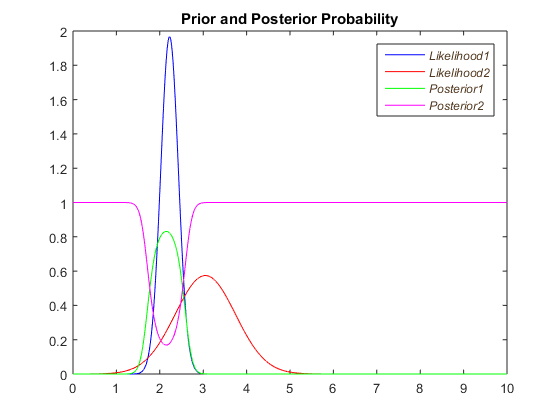

In [5]:
col = 'brgm';
f=figure('Name','Prior and Posterior Probability','NumberTitle','off');
plot(Range,likelihood1,col(1),Range,likelihood2,col(2),...
    Range,posteriorClass1,col(3),Range,posteriorClass2,col(4));
title('Prior and Posterior Probability');
hleg = legend('Likelihood1','Likelihood2','Posterior1','Posterior2');
set(hleg,'FontAngle','italic','TextColor',[.3,.2,.1])

## Testing phase

In [6]:
testresult = testdata;

for i=1:length(testdata(:,1))
    
    p1 = normpdf(testdata(i,1),meanClass1,sigmaClass1)*priorClass1./evidence;
    p2 = normpdf(testdata(i,1),meanClass2,sigmaClass2)*priorClass2./evidence;
    if p1>p2
        testresult(i,3) = 1;
    else
        testresult(i,3) = 2;
    end
end

## computation of misclassification

In [7]:
dat = zeros(2,2);
for i=1:length(testresult(:,2))
    if testresult(i,2)== 1
        if testresult(i,3) == 1
            dat(1,1) = dat(1,1) + 1;
        else
            dat(2,1) = dat(2,1) +1;
        end
    else
        if testresult(i,3) == 1
            dat(1,2) = dat(1,2) + 1;
        else
            dat(2,2) = dat(2,2) +1;
        end
    end
end

In [9]:
dat


dat =

    16     3
     4    27


